In [2]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl


tc = create_taiga_client_v3()

In [3]:
airlines = tc.get(name='nycflights-2013-b1ae', version=1, file='airlines')
airports = tc.get(name='nycflights-2013-b1ae', version=1, file='airports')
flights = tc.get(name='nycflights-2013-b1ae', version=1, file='flights')
planes = tc.get(name='nycflights-2013-b1ae', version=1, file='planes')
weather = tc.get(name='nycflights-2013-b1ae', version=1, file='weather')

[                        ]  0% |   0.0 s/B |   0.0 B / 241.0 B | ETA:  --:--:--
[######################]100% | 272.7 KiB/s | 241.0 B / 241.0 B | ETA:  00:00:00
[                      ]  0% |   0.0 s/B |   0.0 B /  37.0 KiB | ETA:  --:--:--
[##################]100% |  40.4 MiB/s |  37.0 KiB /  37.0 KiB | ETA:  00:00:00
[                      ]  0% |   0.0 s/B |   0.0 B /  14.2 KiB | ETA:  --:--:--
[##################]100% |  14.0 MiB/s |  14.2 KiB /  14.2 KiB | ETA:  00:00:00
[                      ]  0% |   0.0 s/B |   0.0 B / 388.7 KiB | ETA:  --:--:--
[##################]100% | 410.8 MiB/s | 388.7 KiB / 388.7 KiB | ETA:  00:00:00


In [4]:
batting = tc.get('baseball-ac61.1/Batting')
pitching = tc.get('baseball-ac61.1/Pitching')
fielding = tc.get('baseball-ac61.1/Fielding')

[                      ]  0% |   0.0 s/B |   0.0 B /   1.8 MiB | ETA:  --:--:--
[##################]100% |  12.0 MiB/s |   1.8 MiB /   1.8 MiB | Time:  0:00:00
[                      ]  0% |   0.0 s/B |   0.0 B /   1.4 MiB | ETA:  --:--:--
[##################]100% |  63.6 MiB/s |   1.4 MiB /   1.4 MiB | Time:  0:00:00
[                      ]  0% |   0.0 s/B |   0.0 B /   1.8 MiB | ETA:  --:--:--
[##################]100% |  37.9 MiB/s |   1.8 MiB /   1.8 MiB | Time:  0:00:00


In [5]:
flights['sched_dep_dt']=pd.to_datetime(flights.time_hour) + pd.to_timedelta(flights.minute,unit='m')
flights['dep_dt']=(flights.sched_dep_dt) + pd.to_timedelta(flights.dep_delay,unit='m')


In [6]:
arr_mins = pd.to_timedelta(flights.sched_arr_time % 10 + flights.sched_arr_time % 100,unit='m')
arr_hr = pd.to_timedelta(flights.sched_arr_time//100,unit='hour')
arr_day = flights.dep_dt.dt.floor(freq='d')
arr_dt = arr_day + arr_hr + arr_mins
flights['sched_arr_dt'] = arr_dt


In [7]:
flights.loc[flights.sched_arr_dt < flights.sched_dep_dt,'sched_arr_dt'] += pd.to_timedelta([1]*(flights.sched_arr_dt < flights.sched_dep_dt).sum(),unit='day')

In [8]:
flights['arr_dt'] = flights.sched_arr_dt + pd.to_timedelta(flights.arr_delay,unit='m')

In [10]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


In [11]:
flights.loc[:5].T

,0,1,2,3,4,5
year,2013,2013,2013,2013,2013,2013
month,1,1,1,1,1,1
day,1,1,1,1,1,1
dep_time,517.0,533.0,542.0,544.0,554.0,554.0
sched_dep_time,515,529,540,545,600,558
dep_delay,2.0,4.0,2.0,-1.0,-6.0,-4.0
arr_time,830.0,850.0,923.0,1004.0,812.0,740.0
sched_arr_time,819,830,850,1022,837,728
arr_delay,11.0,20.0,33.0,-18.0,-25.0,12.0
carrier,UA,UA,AA,B6,DL,UA


In [13]:
flights.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour                 object
sched_dep_dt      datetime64[ns]
dep_dt            datetime64[ns]
sched_arr_dt      datetime64[ns]
arr_dt            datetime64[ns]
dtype: object

In [15]:
flights.isna().mean()

year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
sched_dep_dt      0.000000
dep_dt            0.024512
sched_arr_dt      0.024512
arr_dt            0.028001
dtype: float64

In [16]:
flights.nunique()

year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
sched_dep_dt      127328
dep_dt            211717
sched_arr_dt      145352
arr_dt            219685
dtype: int64

In [18]:
flights.describe().T

,count,mean,min,25%,50%,75%,max,std
year,336776.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,0.0
month,336776.0,6.54851,1.0,4.0,7.0,10.0,12.0,3.414457
day,336776.0,15.710787,1.0,8.0,16.0,23.0,31.0,8.768607
dep_time,328521.0,1349.109947,1.0,907.0,1401.0,1744.0,2400.0,488.281791
sched_dep_time,336776.0,1344.25484,106.0,906.0,1359.0,1729.0,2359.0,467.335756
dep_delay,328521.0,12.63907,-43.0,-5.0,-2.0,11.0,1301.0,40.210061
arr_time,328063.0,1502.054999,1.0,1104.0,1535.0,1940.0,2400.0,533.264132
sched_arr_time,336776.0,1536.38022,1.0,1124.0,1556.0,1945.0,2359.0,497.457142
arr_delay,327346.0,6.895377,-86.0,-17.0,-5.0,14.0,1272.0,44.633292
flight,336776.0,1971.92362,1.0,553.0,1496.0,3465.0,8500.0,1632.471938


In [24]:
# ~ is for inverting a boolean, so here taking all the rows that do NOT have NA values
flights_nc = flights.loc[~(flights.dep_time.isna() | flights.arr_time.isna()), :]

Text(0, 0.5, 'excess arrival delay')

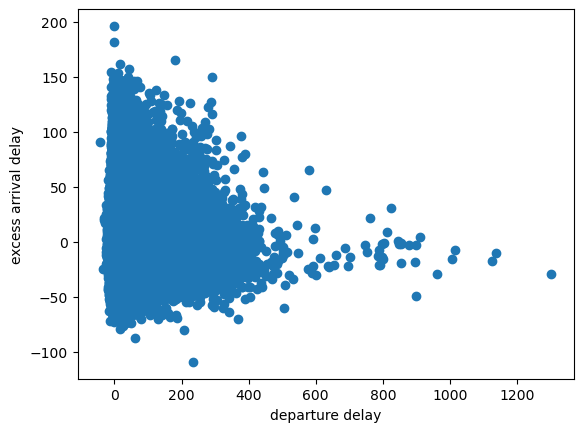

In [25]:
plt.scatter(flights_nc.dep_delay, flights_nc.arr_delay - flights_nc.dep_delay)
plt.xlabel('departure delay')
plt.ylabel('excess arrival delay')

In [28]:
flights_nc.groupby('origin').dep_delay.mean()

origin
EWR    15.035216
JFK    12.044673
LGA    10.298725
Name: dep_delay, dtype: float64

In [31]:
dfg_flights_nc = flights_nc.groupby('origin')

In [32]:
dfg_flights_nc.dep_delay.mean()

origin
EWR    15.035216
JFK    12.044673
LGA    10.298725
Name: dep_delay, dtype: float64

In [35]:
flights_nc.groupby('dest').dep_delay.std().sort_values()

dest
PSP     5.945559
EYW    13.200100
HDN    17.215505
SNA    22.566766
ANC    25.592619
         ...    
TVC    55.640910
BHM    56.071248
CAK    57.214617
HNL    57.925586
LEX          NaN
Name: dep_delay, Length: 104, dtype: float64

Text(0, 0.5, 'destination departure std')

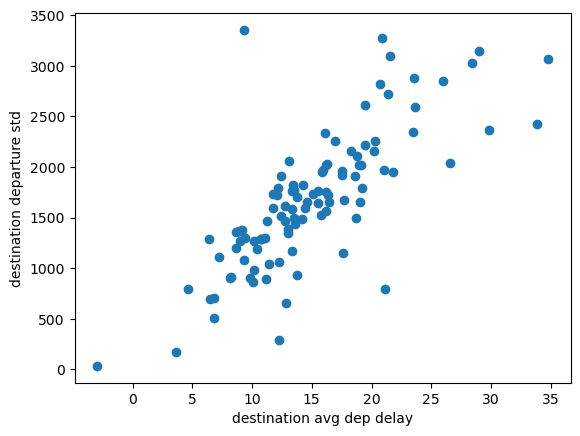

In [36]:
plt.scatter(flights_nc.groupby('dest').dep_delay.mean(),
            flights_nc.groupby('dest').dep_delay.var())
plt.xlabel('destination avg dep delay')
plt.ylabel('destination departure std')

In [ ]:
# Need to go over the aggregate method, you can also put in a lambda function into aggregate
dfg_dest = flights_nc.groupby('dest')
dfg_dest.agg({'dep_delay':['mean', 'std']})

dep_delay           
           mean        std
dest                      
ABQ   13.740157  30.526011
ACK    6.456604  26.320270
ALB   23.447368  48.486180
ANC   12.875000  25.592619
ATL   12.443904  43.752597
...         ...        ...
TPA   12.109130  41.531693
TUL   34.784512  55.427034
TVC   21.536842  55.640910
TYS   28.382353  55.012280
XNA    6.362189  35.901705

[104 rows x 2 columns]

In [38]:
dfg_dest.agg({'dep_delay':['mean', 'std']}).corr()

dep_delay          
                    mean       std
dep_delay mean  1.000000  0.757348
          std   0.757348  1.000000

In [41]:
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean', 'std']))

/var/folders/87/vfmx4mwj1sjgkyr2grsc8tr80000gq/T/ipykernel_9086/1179067528.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean', 'std']))


,mean,std
dest,,
ABQ,7.370106,0.544402
ACK,4.815894,0.509358
ALB,4.538350,0.415422
ANC,8.166432,0.292883
ATL,6.753035,0.566571
...,...,...
TPA,6.984943,0.521179
TUL,6.873666,0.624483
TVC,6.901976,0.449430


In [42]:
dfg_dest.groups

{'ABQ': [27881, 28867, 29830, 30848, 31579, 32436, 33314, 34410, 35366, 36326, 37307, 38086, 38933, 39916, 40960, 41860, 42859, 43839, 44588, 45450, 46430, 47417, 48382, 49387, 50344, 51087, 51942, 52927, 53906, 54874, 55804, 56729, 57514, 58376, 59351, 60320, 61287, 62239, 63252, 64035, 64855, 65856, 66828, 67811, 68799, 69781, 70552, 71340, 72357, 73359, 74323, 75334, 76327, 77114, 77927, 78916, 79883, 80845, 81623, 82253, 83061, 84021, 85045, 86041, 87002, 87791, 88855, 89660, 90448, 91393, 92231, 93349, 94313, 95284, 95937, 96855, 97816, 98732, 99735, 100722, 101651, 102501, 103360, 104342, 105167, 105881, 106777, 107753, 108570, 109421, 110407, 111229, 185558, 186716, 187700, 188693, 189680, 190500, 191383, 192361, ...], 'ACK': [27377, 28354, 29331, 30090, 30318, 31242, 31725, 31929, 32697, 32939, 33946, 34868, 35849, 36622, 36834, 37761, 38241, 38442, 39184, 39417, 43350, 44956, 49862, 207754, 208732, 209699, 210405, 211367, 212357, 213371, 214143, 214310, 215048, 215254, 216006,

In [45]:
dfg_tail_agg = flights_nc.groupby('tailnum').agg({'arr_delay':['mean','std','count']})
dfg_tail_agg.corr()

arr_delay                    
                     mean       std     count
arr_delay mean   1.000000  0.733224 -0.010966
          std    0.733224  1.000000  0.077598
          count -0.010966  0.077598  1.000000

In [159]:
flights_nc.groupby('dest').carrier.nunique().sort_values(ascending=False).iloc[:20]

dest
ORD    7
CLT    7
ATL    7
BOS    7
TPA    7
DTW    6
PIT    6
STL    6
DCA    6
AUS    6
MSY    6
MSP    6
IAD    6
SFO    5
RDU    5
CLE    5
PHX    5
SEA    5
DEN    5
PHL    5
Name: carrier, dtype: int64

<Axes: >

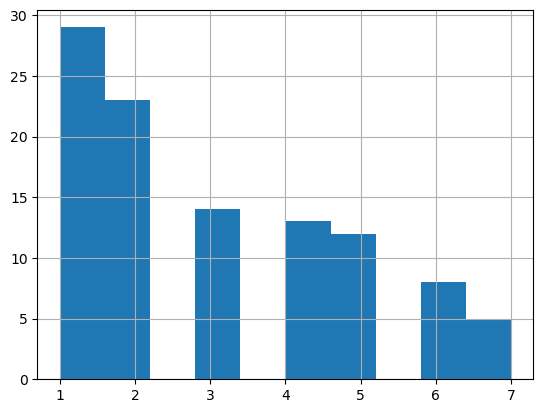

In [49]:
flights_nc.groupby('dest').carrier.nunique().hist()

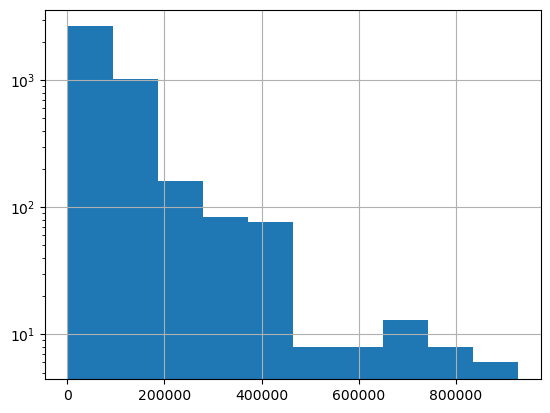

In [54]:
flights_nc.groupby('tailnum').distance.sum().hist()
plt.yscale('log')

In [55]:
flights_nc[flights_nc.dep_dt.dt.hour < 5]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
842,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,...,SJU,189.0,1598,23,59,2013-01-02 23:00:00,2013-01-02 23:59:00,2013-01-03 00:42:00,2013-01-03 04:44:00,2013-01-03 05:20:00
843,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,...,SYR,49.0,209,22,50,2013-01-02 22:00:00,2013-01-02 22:50:00,2013-01-03 01:26:00,2013-01-04 00:08:00,2013-01-04 02:42:00
844,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,...,CLT,108.0,529,5,0,2013-01-02 05:00:00,2013-01-02 05:00:00,2013-01-02 04:58:00,2013-01-02 06:50:00,2013-01-02 07:03:00
1785,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,...,SJU,193.0,1598,23,59,2013-01-03 23:00:00,2013-01-03 23:59:00,2013-01-04 00:32:00,2013-01-04 04:44:00,2013-01-04 05:06:00
1786,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,...,BUF,58.0,301,21,45,2013-01-03 21:00:00,2013-01-03 21:45:00,2013-01-04 00:50:00,2013-01-04 23:12:00,2013-01-05 02:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,...,CLT,84.0,529,5,0,2013-09-25 05:00:00,2013-09-25 05:00:00,2013-09-25 04:51:00,2013-09-25 06:56:00,2013-09-25 06:44:00
332195,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,...,CLT,72.0,529,5,0,2013-09-26 05:00:00,2013-09-26 05:00:00,2013-09-26 04:51:00,2013-09-26 06:56:00,2013-09-26 06:27:00
333191,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,...,CLT,76.0,529,5,0,2013-09-27 05:00:00,2013-09-27 05:00:00,2013-09-27 04:53:00,2013-09-27 06:56:00,2013-09-27 06:35:00
334187,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,...,CLT,77.0,529,5,0,2013-09-28 05:00:00,2013-09-28 05:00:00,2013-09-28 04:51:00,2013-09-28 06:56:00,2013-09-28 06:35:00


In [56]:
flights_c = flights.loc[(flights.dep_time.isna() | flights.arr_time.isna()), :]

In [ ]:
dfg_flights_by_day = flights.groupby(flights.sched_dep_dt.dt.date)

In [ ]:
dfg_flights_by_day = flights.groupby(flights.sched_dep_dt.dt.date)
dfg_cancellations = dfg_flights_by_day.arr_time.apply(lambda x: (x.isna().sum()))
dfg_cancellations

sched_dep_dt
2013-01-01     5
2013-01-02    10
2013-01-03    10
2013-01-04     6
2013-01-05     3
              ..
2013-12-27     2
2013-12-28     1
2013-12-29    19
2013-12-30    14
2013-12-31    16
Name: arr_time, Length: 365, dtype: int64

In [119]:
dfg_flights_by_day.arr_delay.mean()

sched_dep_dt
2013-01-01    12.651023
2013-01-02    12.692888
2013-01-03     5.733333
2013-01-04    -1.932819
2013-01-05    -1.525802
                ...    
2013-12-27    -0.148803
2013-12-28    -3.259533
2013-12-29    18.763825
2013-12-30    10.057712
2013-12-31     6.212121
Name: arr_delay, Length: 365, dtype: float64

Text(0, 0.5, 'Average Delay for a Given Day')

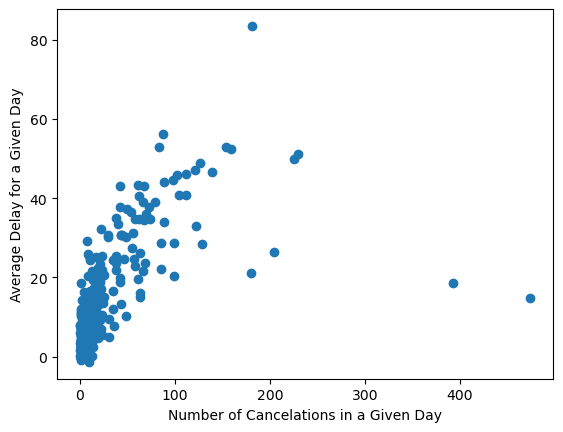

In [125]:
plt.scatter(dfg_cancellations,
            dfg_flights_by_day.dep_delay.mean())
plt.xlabel('Number of Cancelations in a Given Day')
plt.ylabel('Average Delay for a Given Day')

In [103]:
flights.groupby('carrier').agg({'arr_delay':['mean']})

,arr_delay
,mean
carrier,
9E,7.379669
AA,0.364291
AS,-9.930889
B6,9.457973
DL,1.644341
EV,15.796431
F9,21.920705
FL,20.115906


In [112]:
flights.groupby(['carrier']).arr_delay.mean().sort_values(ascending=False)

carrier
F9    21.920705
FL    20.115906
EV    15.796431
YV    15.556985
OO    11.931034
MQ    10.774733
WN     9.649120
B6     9.457973
9E     7.379669
UA     3.558011
US     2.129595
VX     1.764464
DL     1.644341
AA     0.364291
HA    -6.915205
AS    -9.930889
Name: arr_delay, dtype: float64

In [126]:
flights.groupby(['carrier','dest']).arr_delay.mean().sort_values(ascending=False).iloc[:20]

carrier  dest
UA       STL     110.000000
OO       ORD     107.000000
         DTW      68.500000
UA       RDU      56.000000
EV       CAE      42.805825
         TYS      41.150160
         PBI      40.666667
         TUL      33.659864
         OKC      30.619048
UA       JAC      29.894737
MQ       CVG      24.020000
EV       MKE      23.236599
UA       BDL      22.571429
EV       PWM      22.124675
9E       CLE      22.109034
F9       DEN      21.920705
EV       DCA      21.340575
         DSM      21.230068
         RIC      21.216296
FL       ATL      20.744513
Name: arr_delay, dtype: float64

In [130]:
df_flights_small = flights[['sched_dep_dt','dep_dt', 'sched_arr_dt',
                     'arr_dt', 'origin', 'dest', 'tailnum', 'carrier']]

In [128]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [131]:
df_flights_small

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,dest,tailnum,carrier
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,IAH,N14228,UA
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,IAH,N24211,UA
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,MIA,N619AA,AA
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,BQN,N804JB,B6
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,ATL,N668DN,DL
...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,DCA,None,9E
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,SYR,None,9E
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,BNA,N535MQ,MQ
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,CLE,N511MQ,MQ


In [ ]:
# Here left refers to df_flights_small, and right refers to airlines

df_flights_small.merge(airlines, left_on='carrier', right_on = 'carrier')

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,dest,tailnum,carrier,name
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,IAH,N14228,UA,United Air Lines Inc.
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,IAH,N24211,UA,United Air Lines Inc.
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,MIA,N619AA,AA,American Airlines Inc.
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,BQN,N804JB,B6,JetBlue Airways
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,ATL,N668DN,DL,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,DCA,None,9E,Endeavor Air Inc.
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,SYR,None,9E,Endeavor Air Inc.
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,BNA,N535MQ,MQ,Envoy Air
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,CLE,N511MQ,MQ,Envoy Air


In [136]:
len(airlines) == airlines.carrier.nunique()

True

In [139]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1': pd.Series(range(7), dtype = 'Int64')})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': pd.Series(range(3), dtype = 'Int64')})

In [140]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [141]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [145]:
pd.merge(df1, df2.rename(columns={'key':'key2'}), left_on = 'key', right_on = 'key2')

,key,data1,key2,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [146]:
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [147]:
pd.merge(df1, df2, on = 'key', how='outer')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [148]:
pd.merge(df1, df2, on = 'key', how='right')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,d,<NA>,2


In [149]:
pd.merge(df1, df2, on = 'key', how='left')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,c,3,<NA>
4,a,4,0
5,a,5,0
6,b,6,1


In [150]:
# the how method is basically saying which data frame that is being input into the merge is having data kept in the final data frame, so inner is only keeping things in common, outer keeps everything, left keeps from the first data frame and right from the second one

In [153]:
# you can merge on multiple keys

left = pd.DataFrame({'key1':['foo', 'foo', 'bar'],
                     'key2':['one','two','one'],
                     'lval':pd.Series([1,2,3],dtype='Int64')})

right = pd.DataFrame({'key1':['foo','foo','bar','foo'],
                      'key2':['one', 'one', 'one', 'two'],
                      'rval':pd.Series([4,5,6,7],dtype='Int64')})

In [157]:
pd.merge(left, right, on=['key1','key2'],how='inner')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,7
3,bar,one,3,6


In [155]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [156]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,foo,two,7
